In [75]:
import geopandas as gpd
import pandas as pd
import numpy as np
import networkx
from matplotlib import pyplot as plt

https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1270.0.55.003July%202016?OpenDocument

In [76]:
df = gpd.read_file(r"C:\Users\smrut\Downloads\1270055003_poa_2016_aust_shape\POA_2016_AUST.shp")

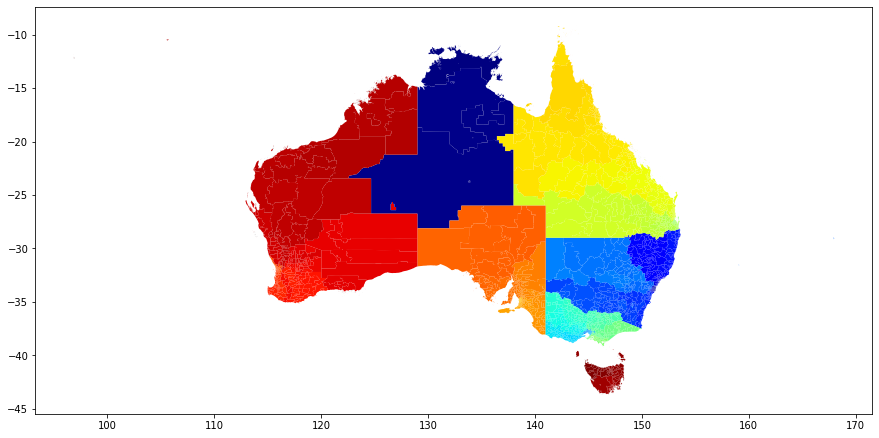

In [77]:
df.plot(figsize=(15, 15), cmap="jet")
plt.show();

In [78]:
df.head()

,POA_CODE16,POA_NAME16,AREASQKM16,geometry
0,0800,0800,3.1734,"POLYGON ((130.83454 -12.45798, 130.83395 -12.4..."
1,0810,0810,23.7902,"POLYGON ((130.84711 -12.37754, 130.84726 -12.3..."
2,0812,0812,35.8899,"POLYGON ((130.89192 -12.36879, 130.89221 -12.3..."
3,0815,0815,0.6381,"POLYGON ((130.87240 -12.37655, 130.87235 -12.3..."
4,0820,0820,39.0462,"POLYGON ((130.83499 -12.43006, 130.83508 -12.4..."


In [79]:
df.shape

(2670, 4)

adjacency_matrix based on neabour

In [80]:
df = df.iloc[:-2,:]
df.shape

(2668, 4)

In [81]:
G_adj_poly = networkx.DiGraph()
num_poly = df.shape[0]
for i in range(num_poly):
    for j in range(num_poly):
        if df.geometry[i].touches(df.geometry[j]):
            G_adj_poly.add_edge(i, j, weight=1)
A_adj_poly = networkx.adjacency_matrix(G_adj_poly).A

adjacency_matrix based on distance between centriods

In [82]:
df["centroid"] = df.geometry.centroid
G_dist = networkx.DiGraph()
for i in range(num_poly):
    for j in range(num_poly):
        if df.geometry[i].touches(df.geometry[j]):
            G_dist.add_edge(i, j, weight=df.centroid[i].distance(df.centroid[j]))
df.drop("centroid", axis=1, inplace=True)
A_dist = networkx.adjacency_matrix(G_dist).A